# Practica regresión lineal y logística

In [1]:
#Equipo 4:

#Paulina Martinez Redondo
#Jaime Erick Sánchez Cisneros
#Melisa Andrea Acevedo Núñez
#César Iván Esparza Soto
#Efraín Ismael Flores Hernández

## Importar

In [2]:
# %load basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import roc_auc_score
import cufflinks as cf

cf.go_offline()

In [4]:
df = pd.read_csv('/home/ef/Documents/Diplomado/data/churn.csv')
df.sample(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4200,8316-BBQAY,Female,0,No,No,65,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),59.95,3921.1,No
4203,4291-YZODP,Female,0,No,Yes,7,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.05,96.8,No
3862,5854-KSRBJ,Male,0,Yes,Yes,70,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.40,1782.05,No
2919,1936-CZAKF,Male,0,Yes,No,49,No,No phone service,DSL,No,...,No,No,Yes,Yes,Two year,No,Credit card (automatic),49.65,2409.9,No


In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
num = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat = [col for col in df.columns if col not in num + ['customerID', 'Churn']]
cat

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

## Análisis exploratorio

### Categóricas

In [7]:
df[cat].isnull().sum()/df[cat].shape[0]
## Al parecer, no hay valores nulos para las variables categóricas

gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
dtype: float64

In [8]:
for col in cat + ['Churn']:
    display(df[col].value_counts(True).reset_index().sort_values(by = col, ascending = False).head(5))

,index,gender
0,Male,0.504756
1,Female,0.495244


,index,SeniorCitizen
0,0,0.837853
1,1,0.162147


,index,Partner
0,No,0.516967
1,Yes,0.483033


,index,Dependents
0,No,0.700412
1,Yes,0.299588


,index,PhoneService
0,Yes,0.903166
1,No,0.096834


,index,MultipleLines
0,No,0.481329
1,Yes,0.421837
2,No phone service,0.096834


,index,InternetService
0,Fiber optic,0.439585
1,DSL,0.343746
2,No,0.216669


,index,OnlineSecurity
0,No,0.496663
1,Yes,0.286668
2,No internet service,0.216669


,index,OnlineBackup
0,No,0.438450
1,Yes,0.344881
2,No internet service,0.216669


,index,DeviceProtection
0,No,0.439443
1,Yes,0.343888
2,No internet service,0.216669


,index,TechSupport
0,No,0.493114
1,Yes,0.290217
2,No internet service,0.216669


,index,StreamingTV
0,No,0.398978
1,Yes,0.384353
2,No internet service,0.216669


,index,StreamingMovies
0,No,0.395428
1,Yes,0.387903
2,No internet service,0.216669


,index,Contract
0,Month-to-month,0.550192
1,Two year,0.240664
2,One year,0.209144


,index,PaperlessBilling
0,Yes,0.592219
1,No,0.407781


,index,PaymentMethod
0,Electronic check,0.335794
1,Mailed check,0.228880
2,Bank transfer (automatic),0.219225
3,Credit card (automatic),0.216101


,index,Churn
0,No,0.73463
1,Yes,0.26537


### Numéricas

In [9]:
df[num].isnull().sum() / df.shape[0]
## Tampoco hay valores ausentes en las variables numéricas

tenure            0.0
MonthlyCharges    0.0
TotalCharges      0.0
dtype: float64

In [10]:
## Pero existe el valor ' ' que se interpreta como ausente
df['TotalCharges'].value_counts(1, dropna = False) 

           0.001562
20.2       0.001562
19.75      0.001278
19.9       0.001136
19.65      0.001136
             ...   
2188.45    0.000142
52.05      0.000142
3313.4     0.000142
413.65     0.000142
6856.95    0.000142
Name: TotalCharges, Length: 6531, dtype: float64

In [11]:
## Se omiten los registros con dicho valor, no hay riesgo de pérdida importante de info
df['TotalCharges'] = df['TotalCharges'].replace(' ',np.nan) 
df['TotalCharges'] = df['TotalCharges'].astype(float) 
df = df[~df['TotalCharges'].isnull()].copy() 
df.reset_index(drop = True, inplace = True)

array([[<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>],
       [<AxesSubplot:title={'center':'TotalCharges'}>, <AxesSubplot:>]],
      dtype=object)

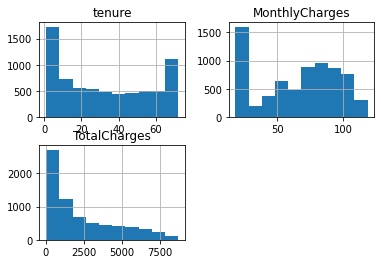

In [12]:
df[num].hist()
## No parece haber outliers importantes

array([[<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>],
       [<AxesSubplot:title={'center':'TotalCharges'}>, <AxesSubplot:>]],
      dtype=object)

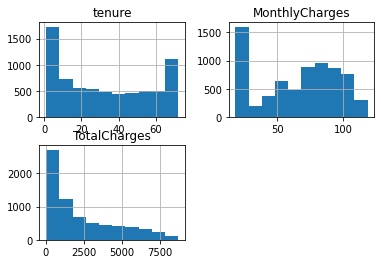

In [13]:
## Con el método IQR comprobamos que efectivamente, no hay outliers
df_clean=df.copy()
for variable in num:
    q1=df_clean[variable].quantile(.25)
    q3=df_clean[variable].quantile(.75)
    iqr=q3-q1
    df_clean=df_clean[~((df_clean[variable]<q1-1.5*iqr)|(df_clean[variable]>q3+1.5*iqr))]
df_clean[num].hist()

## Regresión lineal

In [14]:
df[num].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


### Total vs Mensual

In [15]:
##Se intentará describir la variable TotalCharges a través de la variable MonthlyCharges
reg_lin_1 = df[num].iloc[:,1:].copy()
reg_lin_1.sample(4)

,MonthlyCharges,TotalCharges
6519,20.35,1458.10
1982,89.15,2257.75
1248,19.45,19.45
6755,19.75,309.35


In [16]:
lr = LinearRegression()
lr.fit(X = reg_lin_1[['MonthlyCharges']], y = reg_lin_1['TotalCharges'])

reg_lin_1["y_est"] = lr.predict(X = reg_lin_1[['MonthlyCharges']])
reg_lin_1.sample(4)

,MonthlyCharges,TotalCharges,y_est
4468,20.9,20.90,129.950292
4752,75.1,5013.00,2788.636896
6353,74.9,136.05,2778.826245
2537,72.1,2495.15,2641.477121


In [17]:
score = str('{:,.1%}'.format(lr.score(X = reg_lin_1[['MonthlyCharges']],
                                      y = reg_lin_1['TotalCharges'])))
a = str('{:,.2f}'.format(lr.intercept_))
b = str('{:,.2f}'.format(lr.coef_[0]))

'Modelo: ' + a + 'x + ' + b + ' con precisión: ' + score

'Modelo: -895.26x + 49.05 con precisión: 42.4%'

In [18]:
lr.score(X = reg_lin_1[['MonthlyCharges']], y = reg_lin_1['TotalCharges'])

0.42388537799997383

In [19]:
lr.intercept_

-895.2628084092667

In [20]:
lr.coef_

array([49.05325838])

### Mensual vs Tenure

In [21]:
## Se intentará describir la variable Tenure (meses que el cliente ha estado en la compañía)
# a través de la variable MonthlyCharges
reg_lin_2 = df[num].iloc[:,:-1].copy()
reg_lin_2.sample(4)

,tenure,MonthlyCharges
5771,53,20.20
4722,31,96.60
148,30,64.50
828,50,108.55


In [22]:
lr2 = LinearRegression()
lr2.fit(X = reg_lin_2[['tenure']], y = reg_lin_2['MonthlyCharges'])

reg_lin_2["y_est"] = lr2.predict(X = reg_lin_2[['tenure']])
reg_lin_2.sample(4)

,tenure,MonthlyCharges,y_est
1574,12,80.45,58.618841
2342,8,24.40,57.408493
4284,64,110.30,74.353365
5084,7,20.45,57.105906


In [23]:
lr2.score(X = reg_lin_2[['tenure']], y = reg_lin_2['MonthlyCharges'])

0.06094073182906301

In [24]:
lr2.intercept_

54.98779697699156

In [25]:
lr2.coef_

array([0.30258701])

### Tenure vs Total

In [26]:
#Se intentará describir la variable Tenure a través de la variable TotalCharges
reg_lin_3 = df[num].drop(columns = 'MonthlyCharges').copy()
reg_lin_3.sample(4)

,tenure,TotalCharges
6680,37,3460.95
6046,6,340.40
6257,33,2716.30
1386,29,2440.25


In [27]:
lr3 = LinearRegression()
lr3.fit(X = reg_lin_3[['tenure']], y = reg_lin_3['TotalCharges'])

reg_lin_3["y_est"] = lr3.predict(X = reg_lin_3[['tenure']])
reg_lin_3.sample(4)

,tenure,TotalCharges,y_est
4546,20,2203.70,1335.883111
1598,15,994.55,954.530011
3339,72,7323.15,5301.955354
80,1,79.35,-113.258669


In [28]:
lr3.score(X = reg_lin_3[['tenure']], y = reg_lin_3['TotalCharges'])

0.682078535751238

In [29]:
lr3.intercept_

-189.5292895303628

In [30]:
lr3.coef_

array([76.27062004])

## Accionamiento caso regresivo

El análisis de regresión lineal de cada variable vs el resto, despliega que el modelo "más" acertado es la relación positiva entre los meses que el cliente lleva con la compañía vs los cargos totales, tiene todo el sentido.

Así que la estrategia recomendada para la compañía es mantener a los clientes el tiempo máximo posible. Ahora, para saber cómo segmentar clientes con base en sus características y así enfocar la estrategia de una manera más directa, puede analizarse qué variables explican mejor el comportamiento de que un cliente deje la compañía a través de la transformación entrópica y/o regresión logística.

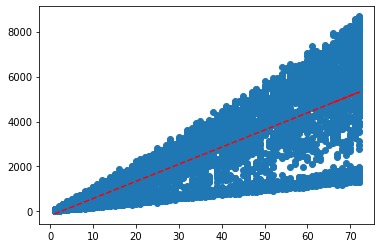

In [31]:
plt.scatter(reg_lin_3['tenure'], reg_lin_3['TotalCharges'])
x = reg_lin_3['tenure']
plt.plot(x, lr3.coef_*x + lr3.intercept_, 'r--')
plt.show()

### Transformación entrópica

Consta de seleccionar las variables categóricas y numéricas-discretizadas (hechas rango) que mejor expliquen el resultado de nuestra variable objetivo

In [32]:
## Si el cliente está aún en la compañía o no, será nuestra variable objetivo
df.loc[df['Churn'] == 'Yes', 'Churn'] = 1
df.loc[df['Churn'] == 'No', 'Churn'] = 0
df['Churn'] = df['Churn'].astype(int)
df['Churn'].value_counts(1)

0    0.734215
1    0.265785
Name: Churn, dtype: float64

In [33]:
## Se discretizan las variables numéricas, se vuelven rangos (por percentil)
for col in num:
    df[f'{col}_cut'] = pd.qcut(df[f'{col}'],
                               q = 4,
                              duplicates = 'drop').astype(str)
## Ejemplo
df['tenure_cut'].value_counts(1, dropna = False)

(0.999, 9.0]    0.262088
(55.0, 72.0]    0.249573
(29.0, 55.0]    0.244454
(9.0, 29.0]     0.243885
Name: tenure_cut, dtype: float64

In [34]:
cut = [col for col in df.columns if col.endswith('cut')]
variables = cat + cut
variables

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'tenure_cut',
 'MonthlyCharges_cut',
 'TotalCharges_cut']

In [35]:
## Se construye la función que enlista el IV (Info Value) por columna
# y además, la función puede crear las variables "woe-izadas"
def iv_woe(obj, df, var, woe = False):
    obj = obj #se instancia dentro de la función para que el siguiente bucle la tome en cuenta
    iv_fin = {} #se crea un diccionario vacío
    for x in var:
        aux = df[[x, obj]].copy() #nos interesa evaluar cada variable vs nuestra variable objetivo
        aux['n'] = 1 #columna de apoyo para hacer la suma

        ## Se transforma la estructura de la tabla:
        aux = aux.pivot_table(columns = obj, #teniendo las opciones de nuestra variable objetivo como columnas
                              index = x, #y las categorías (rangos para las numéricas) como renglones
                              values = 'n', #el contador por categoría vs resultado de la variable objetivo
                              aggfunc = 'sum',
                              fill_value = 0).copy() #llenar los vacíos con ceros

        aux['no_ev'] = aux[0] / aux[0].sum() #divide cada renglón entre el total para obtener la proba de no evento
        aux['si_ev'] = aux[1] / aux[1].sum() #proba de sí evento
        
        aux['woe'] = np.log(aux['no_ev'] / aux['si_ev']) #se crea la columna de WOE (Weight Of Evidence)
        aux['iv'] = aux['woe']*(aux['no_ev'] - aux['si_ev']) #se crea la columna individual de IV (Info Value)

        iv_fin[x] = aux['iv'].sum().round(3) #y finalmente, suma la columna y la agrega al diccionario

        if woe == True: ## crearemos nuevas columnas "woe-izadas"
            aux = aux[['woe']].reset_index().rename(columns={'woe': f'woe_{x}'})
            df = df.merge(aux, on = x, how = 'left')
        
    iv_fin = pd.DataFrame.from_dict(iv_fin,
                                    orient = 'index',
                                    columns = ['IV']).sort_values(by = 'IV', ## se ordenan descendentemente
                                                                  ascending = False)
    iv_fin = iv_fin[iv_fin['IV'] != np.inf].copy() ## Y se eliminan los infinitos
    
    return iv_fin, df

## Se aplica la función que evalúa todas las variables de un dataframe
resultado = iv_woe(obj = 'Churn',
                   df = df,
                   var = variables,
                   woe = True)
resultado[0]

,IV
Contract,1.233
tenure_cut,0.718
OnlineSecurity,0.715
TechSupport,0.697
InternetService,0.615
OnlineBackup,0.526
DeviceProtection,0.498
PaymentMethod,0.456
StreamingMovies,0.380
StreamingTV,0.379


In [36]:
df = resultado[1].copy()
var_woe = [col for col in df.columns if col.startswith('woe_')]

In [37]:
df.sample(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,woe_DeviceProtection,woe_TechSupport,woe_StreamingTV,woe_StreamingMovies,woe_Contract,woe_PaperlessBilling,woe_PaymentMethod,woe_tenure_cut,woe_MonthlyCharges_cut,woe_TotalCharges_cut
4283,7734-DBOAI,Female,0,Yes,Yes,1,No,No phone service,DSL,No,...,-0.574694,0.703190,-0.174272,-0.340714,-0.722408,0.614421,-0.826969,-1.019370,0.104577,-0.752945
1446,6890-PFRQX,Male,0,No,No,18,Yes,Yes,DSL,Yes,...,0.218397,-0.678852,-0.174272,-0.340714,-0.722408,0.614421,0.420824,-0.088367,0.104577,0.065881
1965,5445-UTODQ,Female,0,Yes,No,7,Yes,No,Fiber optic,No,...,-0.574694,-0.678852,-0.174272,-0.340714,-0.722408,-0.334461,-0.826969,-1.019370,-0.507415,0.065881
5022,6101-IMRMM,Male,0,No,Yes,6,Yes,No,Fiber optic,No,...,0.218397,-0.678852,-0.174272,-0.166549,-0.722408,0.614421,0.420824,-1.019370,-0.302418,0.065881


Así que, existen múltiples variables que pueden tomarse en cuenta para prevenir que un cliente se vaya de la compañía, algunas más influyentes que otras.

## Regresión logística

In [38]:
df['tenure'] = df['tenure'].astype(float)
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)

target = 'Churn'
df[target].value_counts(1)

0    0.734215
1    0.265785
Name: Churn, dtype: float64

In [39]:
X = df[num].join(pd.get_dummies(df[cat]))
y = df[target]

from sklearn.feature_selection import SelectKBest, f_classif, f_regression

kb = SelectKBest(k = int(round(len(X.columns)*.1,0)), score_func = f_regression)
kb.fit(X, y)

ls_best = [x for x, y in zip(X.columns, kb.get_support()) if y]
ls_best

['tenure',
 'InternetService_Fiber optic',
 'OnlineSecurity_No',
 'TechSupport_No',
 'Contract_Month-to-month']

In [40]:
X = pd.DataFrame(kb.transform(X), columns = ls_best)
X

,tenure,InternetService_Fiber optic,OnlineSecurity_No,TechSupport_No,Contract_Month-to-month
0,1.0,0.0,1.0,1.0,1.0
1,34.0,0.0,0.0,1.0,0.0
2,2.0,0.0,0.0,1.0,1.0
3,45.0,0.0,0.0,0.0,0.0
4,2.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...
7027,24.0,0.0,0.0,0.0,0.0
7028,72.0,1.0,1.0,1.0,0.0
7029,11.0,0.0,0.0,1.0,1.0
7030,4.0,1.0,1.0,1.0,1.0


In [41]:
from sklearn.model_selection import cross_val_score, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [42]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.7804323094425484

In [43]:
ls_scores = cross_val_score(cv=4,
                            estimator=logreg,
                            X = X_train,
                            y=y_train)

np.mean(ls_scores), np.std(ls_scores)

(0.791426604971578, 0.008899841793055085)

In [44]:
roc_auc_score(y_score=logreg.predict(X_test), y_true=y_test)

0.6766633213294765

In [45]:
[round(x, 4) for x in logreg.coef_[0]]

[-0.0301, 1.1651, 0.5791, 0.5185, 0.9094]

 Interpretación del modelo:
   Contrato mes a mes es la variable que relevancia tiene, esto dado que los clientes al no tener un periodo
      establecido que seguir pueden salir en cualquier momento
  
  
  La variable tenur que nos dice cuantos meses ha estado en la compañía, no es particularmente relevante para
      entender el comportamiento de si se van de la compañía, es decir tanto clientes con mucho tiempo como 
      con poco se van
   
   
   Seguridad online y tenga soporte técnico son factores relevantes, esto porque nos indica que es 
      el interés de mantener y proteger su cuenta
   
   
   Servicio de internet con fibra optica es un factor importante para entender si los clientes se van de la
      compañía ya que al tener más acceso a los servios (sin ir a una sucursal) es más probable que pueda en 
      cualquier momento decidir hacer cambios a su cuenta

## Accionamientos antifugas

1. Promover contratos con tiempo indefinido o plazos mayores a un mes por medio de incentivos o beneficios

2. Promover o/e invertir en servicios al cliente, que ayuden a aumentar las cuentas con seguridad online y accesos a soporte técnico de manera más sencilla

3. Dar beneficios tanto a clientes nuevos como con antiguedad